### Data Collection and Processing

The bus station data was collected using Google Maps My Maps, and we processed the data by extracting the latitude and longitude coordinates from the 'WKT' column. The extracted coordinates were then organized into a new dataset containing the bus station names along with their corresponding latitude and longitude values. The processed data was then saved as a CSV file for further use.


In [ ]:
import pandas as pd


file_path = "Riyadh_raw_data/UnprocessedBus.csv"  
data = pd.read_csv(file_path)


data[['longitude', 'latitude']] = data['WKT'].str.extract(r'POINT \(([-\d.]+) ([-\d.]+)\)')


processed_data = data[['name', 'latitude', 'longitude']]


output_path = 'processedBus.csv'
processed_data.to_csv(output_path, index=False)

print(f"Processed bus saved to {output_path}")



# Exploratory Data Analysis on Bus Stations in Riyadh



The dataset includes latitude and longitude for each bus station. Let's explore the data creatively with insights and visuals!


In [21]:
%pip install seaborn
%pip install numpy
%pip install pandas
%pip install matplotlib
%matplotlib inline
%pip install geopy
%pip install folium

In [15]:
import pandas as pd

# file_path = 
data = pd.read_csv('Riyadh_structured_data/riyadh_bus_stations.csv')

print(data.head())

                                   attraction_by_bus   latitude  longitude  \
0                 Ministry of Interior (FSF) project  24.773121  46.851028   
1     الإدارة العامة للخدمات الطبية (وزارة الداخلية)  24.569527  46.630859   
2  Saudi Broadcasting Corporation (هيئة الإذاعة و...  24.643877  46.695303   
3  Banque Saudi Fransi - Private Banking Head Off...  24.713659  46.675551   
4  Alinma Bank Head Office (مصرف الإنماء المركز ا...  24.706713  46.675141   

                StationName  Station_Latitude  Station_Longitude  Distance_km  
0         Ibnul-Haitham 104         24.783950          46.818746     3.474421  
1  As-Suwaidi Al-Gharbi 601         24.581065          46.616877     1.909244  
2       Madina Munwarah 321         24.628902          46.715880     2.664244  
3            Takhassusi 107         24.724692          46.653465     2.545902  
4         King Abdullah 405         24.717283          46.638544     3.879053  


In [16]:
missing = data.isnull().sum()*100 / len(data)
print(missing)

attraction_by_bus     0.0
latitude              0.0
longitude             0.0
StationName          25.0
Station_Latitude     25.0
Station_Longitude    25.0
Distance_km          25.0
dtype: float64


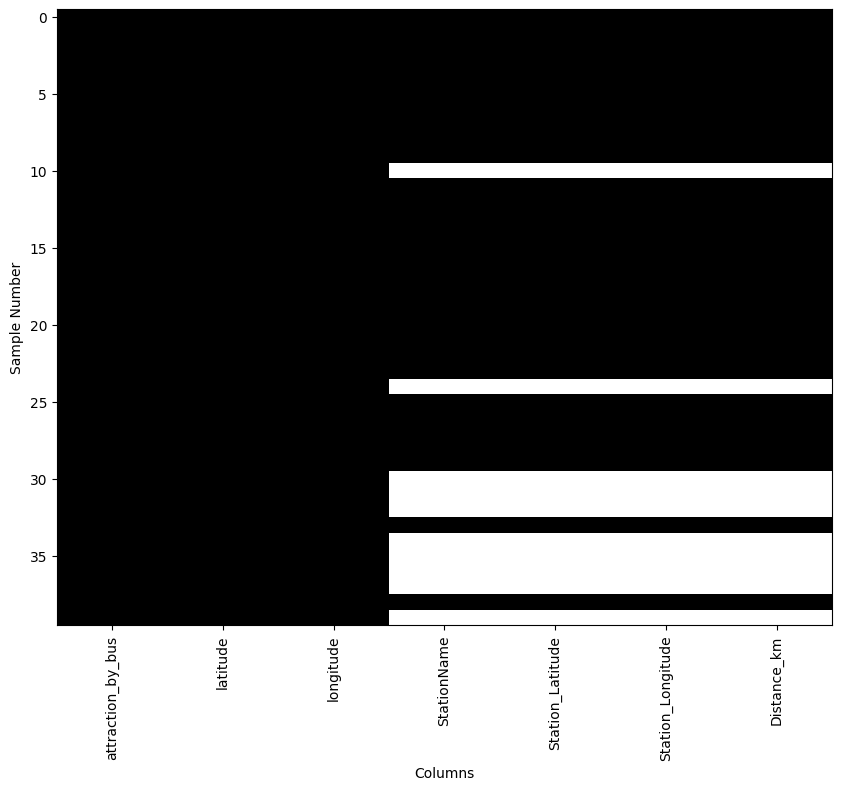

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")

# Set the x-tick labels to the column names
plt.xticks(ticks=range(len(data.columns)), labels=data.columns, rotation=90)

# Labeling the axes
plt.xlabel("Columns")
plt.ylabel("Sample Number")

# Display the plot
plt.show()


### Insights on Missing Data and Bus Station Distribution

- **Missing Data**:
  - **`StationName`, `Station_Latitude`, `Station_Longitude`, `Distance_to_Attraction`** have **25% missing data**, indicating poor bus stations distribution.
  - Other columns like **`attraction_by_bus`, `latitude`, and `longitude`** have no missing data.

- **Impact on Distribution**:
  - Missing bus stations data suggests **imbalanced bus station coverage**, leaving some attractions without bus stations.

- **Recommendations**:
  - **Prioritize areas with missing stations** to ensure better coverage.

In [18]:
import numpy as np

data = data.fillna('NaN')

In [19]:
data.to_csv('Riyadh_structured_data/riyadh_bus_stations.csv', index=False, encoding='utf-8-sig')

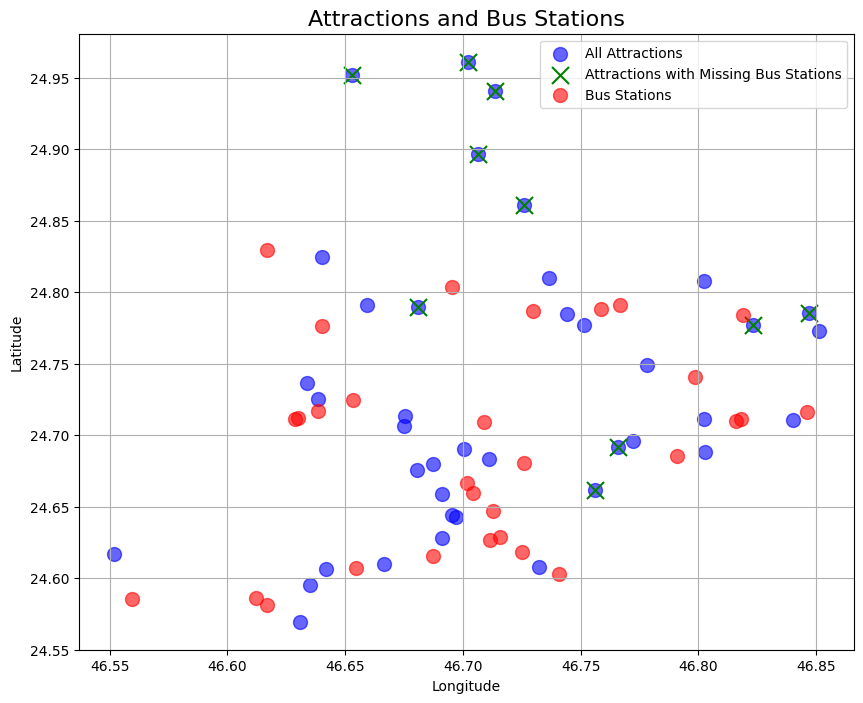

In [6]:
import matplotlib.pyplot as plt

attractions_with_null_bus = data[data['Station_Latitude'].isnull() | data['Station_Longitude'].isnull()]

# Plotting all attractions, attractions with missing bus stations, and valid bus stations
plt.figure(figsize=(10, 8))

plt.scatter(data['longitude'], data['latitude'], c='blue', label='All Attractions', alpha=0.6, marker='o', s=100)

plt.scatter(attractions_with_null_bus['longitude'], attractions_with_null_bus['latitude'], c='green', label='Attractions with Missing Bus Stations', alpha=1.0, marker='x', s=150)

plt.scatter(data['Station_Longitude'], data['Station_Latitude'], c='red', label='Bus Stations', alpha=0.6, marker='o', s=100)

plt.title('Attractions and Bus Stations', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.grid(True)
plt.show()

### Insights on Bus Station Distribution

- **Uneven Distribution**: The presence of several attractions without nearby bus stations suggests that the current bus station placement may not provide **sufficient coverage** across the city.

- **Unequal Coverage**: There are likely **imbalanced areas** in the bus station distribution, leaving several attractions without nearby bus stations.

- **Identifying Key Areas for Improvement**: The areas marked by **green "X"s** should be prioritized for additional bus stations to improve **accessibility** and **coverage**.

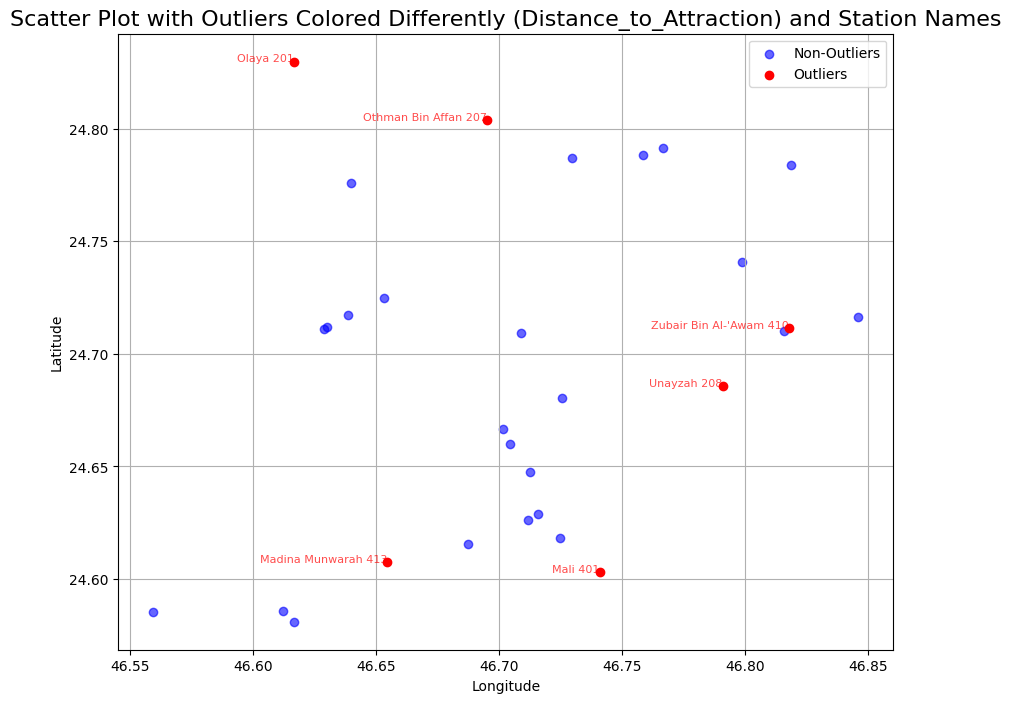

In [7]:
import matplotlib.pyplot as plt

# Calculate the IQR for the Distance_to_Attraction column
Q1 = data['Distance_to_Attraction'].quantile(0.25)
Q3 = data['Distance_to_Attraction'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = (data['Distance_to_Attraction'] < lower_bound) | (data['Distance_to_Attraction'] > upper_bound)

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Plot non-outliers (in blue)
plt.scatter(data.loc[~outliers, 'Station_Longitude'], data.loc[~outliers, 'Station_Latitude'], c='blue', label='Non-Outliers', alpha=0.6)

# Plot outliers (in red)
plt.scatter(data.loc[outliers, 'Station_Longitude'], data.loc[outliers, 'Station_Latitude'], c='red', label='Outliers', alpha=1.0)

# Annotate outlier stations with their names
for i, row in data.loc[outliers].iterrows():
    plt.text(row['Station_Longitude'], row['Station_Latitude'], row['StationName'], fontsize=8, ha='right', color='red', alpha=0.7)

# Adding labels and title
plt.title('Scatter Plot with Outliers Colored Differently (Distance_to_Attraction) and Station Names', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


### Insights from Outlier Detection on Bus Station Distances to Attractions

The scatter plot above identifies outliers based on the **Distance_to_Attraction** column. The red points represent outliers, which are bus stations that are significantly farther from the attraction compared to the other stations. The blue points represent non-outliers, which are closer and show a more typical distribution of bus station locations.

#### Outliers:
The following bus stations are considered outliers:
- **Olaya (20 km)**
- **Othman Bin Affan (20 km)**
- **Zubair Bin Al-‘Awam (41 km)**
- **Unayzah (20 km)**
- **Madina Munwarah (41 km)**
- **Mali (40 km)**

These stations are located far away from central areas, possibly indicating peripheral locations or discrepancies in the data.

In [ ]:
import folium

map_center = [data['latitude'].mean(), data['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add attractions to the map
for _, row in data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['attraction_by_bus'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Add stations to the map
for _, row in data.iterrows():
    if not pd.isna(row['Station_Latitude']) and not pd.isna(row['Station_Longitude']):
        folium.Marker(
            location=[row['Station_Latitude'], row['Station_Longitude']],
            popup=row['StationName'],
            icon=folium.Icon(color='red', icon='bus')
        ).add_to(m)

m.save('attractions_bus_stations_map.html')
print("Map saved as 'attractions_bus_stations_map.html'")


ValueError: Location values cannot contain NaNs.